<a href="https://colab.research.google.com/github/DenisKozachok/learnGenAi/blob/lesson3/Lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F # This line is added to import the functional module



In [2]:
# Трансформації для нормалізації даних
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Завантаження навчального набору даних
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
# Розділення на навчальну та валідаційну вибірки
from torch.utils.data import random_split

train_size = int(0.8 * len(trainset))
validation_size = len(trainset) - train_size
train_dataset, validation_dataset = random_split(trainset, [train_size, validation_size])

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False)

# Завантаження тестового набору даних
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.8MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 196kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.13MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch Normalization
        self.dropout1 = nn.Dropout(0.5)  # Dropout

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(64, 10)  # Вихідний шар для класифікації 10 класів

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

net = Net()


In [4]:
criterion = nn.CrossEntropyLoss()  # Функція втрат

# Оптимізатор з L2 регуляризацією (weight decay)
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)


In [7]:
num_epochs = 30
train_losses = []
validation_losses = []
train_accuracies = []
validation_accuracies = []

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Оцінка на валідаційній вибірці
    net.eval()
    validation_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in validationloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    validation_loss = validation_loss / len(validationloader)
    validation_accuracy = 100 * correct / total
    validation_losses.append(validation_loss)
    validation_accuracies.append(validation_accuracy)

    print(f'Епоха {epoch+1}/{num_epochs}, '
          f'Втрата навчання: {train_loss:.3f}, Точність навчання: {train_accuracy:.2f}%, '
          f'Втрата валідації: {validation_loss:.3f}, Точність валідації: {validation_accuracy:.2f}%')

print('Навчання завершено')


Епоха 1/30, Втрата навчання: 0.836, Точність навчання: 73.11%, Втрата валідації: 0.477, Точність валідації: 82.92%
Епоха 2/30, Втрата навчання: 0.580, Точність навчання: 80.73%, Втрата валідації: 0.412, Точність валідації: 85.40%
Епоха 3/30, Втрата навчання: 0.527, Точність навчання: 82.30%, Втрата валідації: 0.387, Точність валідації: 85.98%
Епоха 4/30, Втрата навчання: 0.507, Точність навчання: 83.08%, Втрата валідації: 0.388, Точність валідації: 86.16%
Епоха 5/30, Втрата навчання: 0.475, Точність навчання: 83.97%, Втрата валідації: 0.363, Точність валідації: 86.79%
Епоха 6/30, Втрата навчання: 0.466, Точність навчання: 84.47%, Втрата валідації: 0.355, Точність валідації: 87.10%
Епоха 7/30, Втрата навчання: 0.448, Точність навчання: 84.67%, Втрата валідації: 0.352, Точність валідації: 87.36%
Епоха 8/30, Втрата навчання: 0.442, Точність навчання: 85.03%, Втрата валідації: 0.349, Точність валідації: 87.56%
Епоха 9/30, Втрата навчання: 0.429, Точність навчання: 85.49%, Втрата валідації:

In [8]:
# Оцінка на тестовому наборі
net.eval()
test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss = test_loss / len(testloader)
test_accuracy = 100 * correct / total

print(f'Втрата на тестовому наборі: {test_loss:.3f}, Точність на тестовому наборі: {test_accuracy:.2f}%')


Втрата на тестовому наборі: 0.316, Точність на тестовому наборі: 88.83%


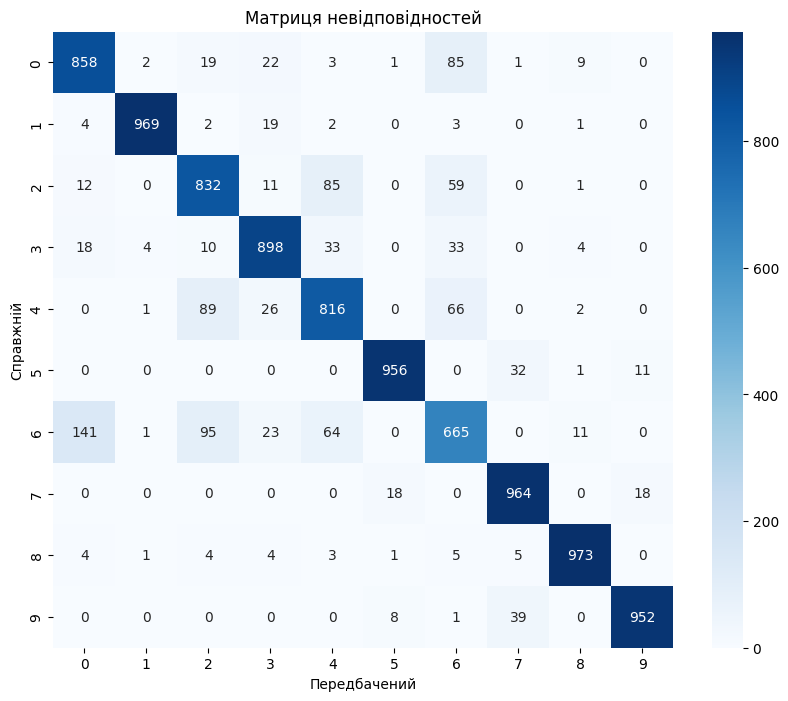

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Передбачений')
plt.ylabel('Справжній')
plt.title('Матриця невідповідностей')
plt.show()


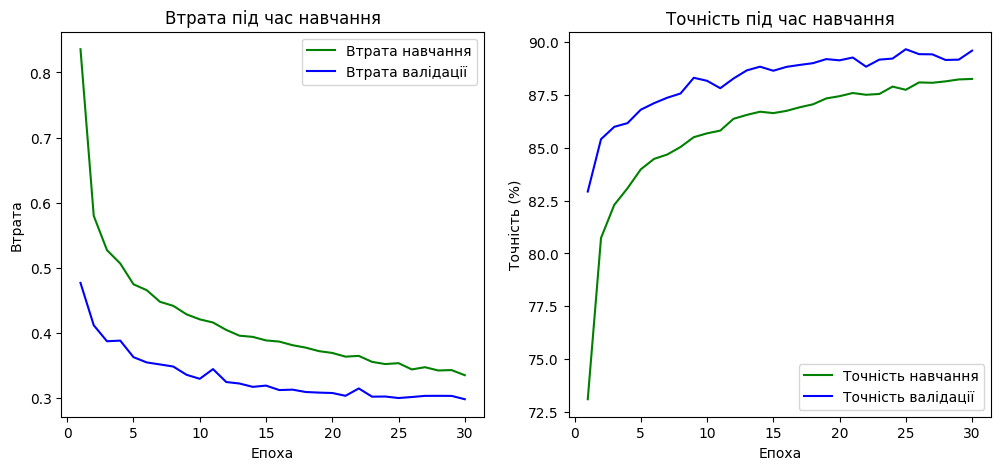

In [10]:
epochs = range(1, num_epochs+1)

plt.figure(figsize=(12,5))

# Втрати
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'g-', label='Втрата навчання')
plt.plot(epochs, validation_losses, 'b-', label='Втрата валідації')
plt.title('Втрата під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()

# Точність
plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, 'g-', label='Точність навчання')
plt.plot(epochs, validation_accuracies, 'b-', label='Точність валідації')
plt.title('Точність під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність (%)')
plt.legend()

plt.show()


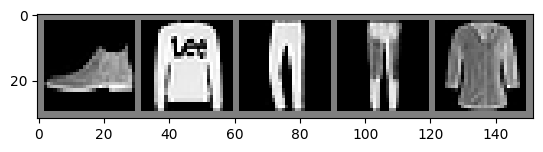

Справжні: Черевики | Светр | Брюки | Брюки | Сорочка
Передбачені: Черевики | Светр | Брюки | Брюки | Сорочка


In [12]:
# Візуалізація деяких передбачень
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Класи FashionMNIST
classes = ('Футболка/Топ', 'Брюки', 'Светр', 'Сукня', 'Пальто',
           'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики')

# Функція для відображення зображень
def imshow(img):
    img = img / 2 + 0.5  # Де-нормалізація
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Показати перші 5 зображень з передбаченнями
imshow(torchvision.utils.make_grid(images[:5]))
print('Справжні:', ' | '.join('%5s' % classes[labels[j]] for j in range(5)))
print('Передбачені:', ' | '.join('%5s' % classes[predicted[j]] for j in range(5)))
